In [66]:
import os
import sys
import pandas as pd
from os.path import expanduser
import numpy as np
        
from  pysd2cat.analysis import od_predictor

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [90]:
df1 = pd.read_csv(os.path.join(os.getcwd(), '../resources/tx_od.csv'), index_col=0)
#df1.loc[:, 'inc_time_2'] = df1.apply(lambda x: float(x['inc_time_2'].split(":")[0]), axis=1)
#df1.loc[:, 'inc_time_1'] = df1.apply(lambda x: float(x['inc_time_1'].split(":")[0]), axis=1)
#df1.loc[:, 'inc_temp'] = df1.apply(lambda x: float(x['inc_temp'].split("_")[1]), axis=1)
df1

,SynBioHub URI,Unnamed: 0.1,calibration_id,experiment_id,filename,glycerol_plate_index,glycerol_stock,growth_media_1,growth_media_2,id,inc_temp,inc_time_1,inc_time_2,input,lab,lab_id,media,od,od_cutoff,output,part_1_id,part_2_id,plate_id,post_gfp_raw,post_od_corrected,post_od_raw,post_well,pre_gfp_raw,pre_od_corrected,pre_od_raw,pre_well,replicate,source_container,strain,strain_circuit,well
0,https://hub.sd2e.org/user/sd2e/design/UWBF_7375/1,0.0,r1c5yc37m8qs2,11_8_2018_1,/work/05202/dbryce/xplan-reactor/fcs/YeastGates-11-15-2018-Run4_Sytox-YeastGates_SytoxYG-Plate_A1.fcs,11.0,08-30-2018-2,standard_media,standard_media,11_8_2018_1_3_A1,warm_30,16:hour,16:hour,1,transcriptic,r1c5vaeb8vbt9_r1c66mfpj7guh,standard_media,0.000300,0.1,0.0,r1c5vaeb8vbt9,r1c66mfpj7guh,3.0,38609.608564,3.568378,1.051520,a1,40024.111611,4.556093,1.342577,a3,0.0,ct1bvwmbhusgjg,https://hub.sd2e.org/user/sd2e/design/UWBF_7375/1,AND,a1
1,https://hub.sd2e.org/user/sd2e/design/UWBF_7300/1,1.0,r1c5yc37m8qs2,11_8_2018_1,/work/05202/dbryce/xplan-reactor/fcs/YeastGates-11-15-2018-Run4_Sytox-YeastGates_SytoxYG-Plate_B1.fcs,11.0,08-30-2018-2,standard_media,standard_media,11_8_2018_1_3_B1,warm_30,16:hour,16:hour,0,transcriptic,r1c5vaeb8vbt9_r1c66mfpj7guh,standard_media,0.000300,0.1,1.0,r1c5vaeb8vbt9,r1c66mfpj7guh,3.0,37298.042023,1.414785,0.416905,b1,39829.311835,4.982175,1.468134,e8,0.0,ct1bvwmbhusgjg,https://hub.sd2e.org/user/sd2e/design/UWBF_7300/1,XNOR,b1
2,https://hub.sd2e.org/user/sd2e/design/UWBF_7375/1,2.0,r1c5yc37m8qs2,11_8_2018_1,/work/05202/dbryce/xplan-reactor/fcs/YeastGates-11-15-2018-Run4_Sytox-YeastGates_SytoxYG-Plate_C1.fcs,11.0,08-30-2018-2,standard_media,standard_media,11_8_2018_1_3_C1,warm_30,16:hour,16:hour,1,transcriptic,r1c5vaeb8vbt9_r1c66mfpj7guh,standard_media,0.000750,0.1,0.0,r1c5vaeb8vbt9,r1c66mfpj7guh,3.0,39886.498815,4.650828,1.370494,c1,40024.111611,4.556093,1.342577,a3,0.0,ct1bvwmbhusgjg,https://hub.sd2e.org/user/sd2e/design/UWBF_7375/1,AND,c1
3,https://hub.sd2e.org/user/sd2e/design/UWBF_16969/1,3.0,r1c5yc37m8qs2,11_8_2018_1,/work/05202/dbryce/xplan-reactor/fcs/YeastGates-11-15-2018-Run4_Sytox-YeastGates_SytoxYG-Plate_D1.fcs,11.0,08-30-2018-2,standard_media,standard_media,11_8_2018_1_3_D1,warm_30,16:hour,16:hour,1,transcriptic,r1c5vaeb8vbt9_r1c66mfpj7guh,standard_media,0.000750,0.1,1.0,r1c5vaeb8vbt9,r1c66mfpj7guh,3.0,37675.399501,2.494735,0.735142,d1,37890.338105,3.335819,0.982990,d7,0.0,ct1bvwmbhusgjg,https://hub.sd2e.org/user/sd2e/design/UWBF_16969/1,XOR,d1
4,https://hub.sd2e.org/user/sd2e/design/UWBF_16967/1,4.0,r1c5yc37m8qs2,11_8_2018_1,/work/05202/dbryce/xplan-reactor/fcs/YeastGates-11-15-2018-Run4_Sytox-YeastGates_SytoxYG-Plate_E1.fcs,11.0,08-30-2018-2,standard_media,standard_media,11_8_2018_1_3_E1,warm_30,16:hour,16:hour,11,transcriptic,r1c5vaeb8vbt9_r1c66mfpj7guh,standard_media,0.000300,0.1,0.0,r1c5vaeb8vbt9,r1c66mfpj7guh,3.0,39326.071961,3.918860,1.154799,e1,40845.469102,5.142327,1.515328,b8,0.0,ct1bvwmbhusgjg,https://hub.sd2e.org/user/sd2e/design/UWBF_16967/1,XOR,e1
5,https://hub.sd2e.org/user/sd2e/design/UWBF_7373/1,5.0,r1c5yc37m8qs2,11_8_2018_1,/work/05202/dbryce/xplan-reactor/fcs/YeastGates-11-15-2018-Run4_Sytox-YeastGates_SytoxYG-Plate_F1.fcs,11.0,08-30-2018-2,standard_media,standard_media,11_8_2018_1_3_F1,warm_30,16:hour,16:hour,10,transcriptic,r1c5vaeb8vbt9_r1c66mfpj7guh,standard_media,0.000300,0.1,0.0,r1c5vaeb8vbt9,r1c66mfpj7guh,3.0,37672.277802,2.659247,0.783620,f1,40162.160129,4.666875,1.375223,c3,0.0,ct1bvwmbhusgjg,https://hub.sd2e.org/user/sd2e/design/UWBF_7373/1,AND,f1
6,https://hub.sd2e.org/user/sd2e/design/UWBF_16968/1,6.0,r1c5yc37m8qs2,11_8_2018_1,/work/05202/dbryce/xplan-reactor/fcs/YeastGates-11-15-2018-Run4_Sytox-YeastGates_SytoxYG-Plate_G1.fcs,11.0,08-30-2018-2,standard_media,standard_media,11_8_2018_1_3_G1,warm_30,16:hour,16:hour,10,transcriptic,r1c5vaeb8vbt9_r1c66mfpj7guh,standard_media,0.000750,0.1,1.0,r1c5vaeb8vbt9,r1c66mfpj7guh,3.0,39718.756729,4.994909,1.471887,g1,40516.098534,4.833329,1.424273,a8,0.0,c

In [91]:
#df1.loc[:,'post_od_raw_obs'] = df1['post_od_raw']
targets=[0.05, 0.1, 0.25, 0.5, 1.0]
duration = "8:hour"


dfp = pd.DataFrame({'SynBioHub URI' : df1['SynBioHub URI'].unique()})
dfp.loc[:, 'inc_time_1'] = 18
dfp.loc[:, 'inc_time_2'] = duration
dfp.loc[:, 'growth_media_1'] = 'standard_media'
dfp.loc[:, 'growth_media_2'] = 'standard_media'
dfp.loc[:, 'inc_temp'] = "warm_30"
dfp.loc[:, 'od'] = 0

dfp.loc[:,'key'] = 0 
fdf = pd.DataFrame({'post_od_raw' : targets})
fdf.loc[:,'key'] = 0
dfp = dfp.merge(fdf, how='left', on='key').drop(columns=['key'])

Text(0.5, 1.0, '8:hourh Actual Post OD')

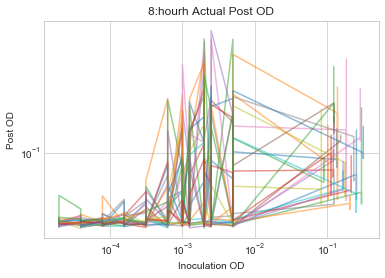

In [97]:
# Actual Data

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

strains = df1['SynBioHub URI'].unique()

data=df1.loc[df1['inc_time_2'] == duration]

#for target in targets:
#    plt.axhline(target)
    
for strain in strains:
    p = data.loc[data['SynBioHub URI'] == strain]
    p = p.sort_values(['od'], ascending=True)
    plt.plot(p['od'], p['post_od_raw'], label=strain,alpha=0.5);


#    s = predictions.loc[(predictions['SynBioHub URI'] == strain)  ]
#    s = s.sort_values(['post_od_raw'], ascending=True)
#    plt.plot(s['od_predictions'], s['post_od_raw'], label=None,  marker='x', alpha=0.5);

    
    
    #plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Inoculation OD")
plt.ylabel("Post OD")

plt.title(str(duration) + "h Actual Post OD")



In [93]:
predictions = od_predictor.predict(df1, dfp)

▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 09:00:39
Normalizing training and testing splits...
{'standard_media', 'slow_media', 'high_osm_media'}
{'standard_media', 'high_osm_media', 'slow_media'}
{'standard_media'}
{'standard_media', 'high_osm_media', 'slow_media'}
{'standard_media', 'slow_media', 'high_osm_media'}
{'standard_media', 'high_osm_media', 'slow_media'}
{'standard_media'}
{'standard_media', 'high_osm_media', 'slow_media'}
{'warm_30', 'warm_37'}
{'warm_30', 'warm_37'}
{'warm_30'}
{'warm_30', 'warm_37'}
{'16:hour', '18:hour'}
{'16:hour', '18:hour'}
{18}
{'16:hour', 18, '18:hour'}
{'12:hour', '15:hour', '18:hour', '10:hour', '8:hour', '16:hour'}
{'12:hour', '15:hour', '18:hour', '10:hour', '8:hour', '16:hour'}
{'8:hour'}
{'12:hour', '15:hour', '18:hour', '10:hour', '8:hour', '16:hour'}
{'https://hub.sd2e.org/user/sd2e/design/UWBF_7374/1', 'https://hub.sd2e.org/user/sd2e/design/UWBF_5992/1', 'https:

Text(0.5, 1.0, '8:hourh Predicted Post OD = 1.0')

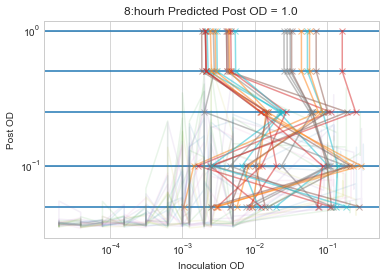

In [94]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

strains = df1['SynBioHub URI'].unique()

data=df1.loc[df1['inc_time_2'] == duration]

for target in targets:
    plt.axhline(target)
    
for strain in strains:
    p = data.loc[data['SynBioHub URI'] == strain]
    p = p.sort_values(['od'], ascending=True)
    plt.plot(p['od'], p['post_od_raw'], label=strain,alpha=0.1);


    s = predictions.loc[(predictions['SynBioHub URI'] == strain)  ]
    s = s.sort_values(['post_od_raw'], ascending=True)
    plt.plot(s['od_predictions'], s['post_od_raw'], label=None,  marker='x', alpha=0.5);

    
    
    #plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Inoculation OD")
plt.ylabel("Post OD")
plt.title(str(duration) + "h Predicted Post OD = " + str(target))



In [51]:
from pysd2cat.analysis.doubling_time import find_time_of_increase, doubling_time, exp_func
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

df = pd.read_csv(os.path.join(os.getcwd(), '../resources/tx_od.csv'), index_col=0, dtype={'input': object})
df.loc[:, 'inc_time_2'] = df.apply(lambda x: float(x['inc_time_2'].split(":")[0]), axis=1)
df.loc[:, 'inc_time_1'] = df.apply(lambda x: float(x['inc_time_1'].split(":")[0]), axis=1)
df.loc[:, 'inc_temp'] = df.apply(lambda x: float(x['inc_temp'].split("_")[1]), axis=1)

y_value = 'post_od_raw'
x_value = 'inc_time_2'
grouping = ['SynBioHub URI', 'od', 'media', 'inc_temp']


groups = df.groupby(grouping)
#groups.first()
doubling_times = pd.DataFrame()
for k, group in groups:
    #print(k)
    group = group.groupby(x_value).mean().reset_index()
    #print(group)
    if len(group) < 3:
        continue
        
    group = group.sort_values(by=x_value)
    #print(group[[x_value, y_value]])
#    try:
#        time_of_increase, cond_well_df = find_time_of_increase(group, y_value, 
#                                                               window = 1, time_col=x_value)
#    except Exception as e:
#        time_of_increase = group[x_value].iloc[0]
#        cond_well_df = group
#    #print("Time of increase = " + str(time_of_increase))
#    increasing_df = cond_well_df.loc[cond_well_df[x_value] >= time_of_increase]
    
#    if len(increasing_df) < 2:
#        continue
    
    try:
#        (time_points,y_vals,popt,pcov) = doubling_time(increasing_df, y_value, time_col=x_value)
        (time_points,y_vals,popt,pcov) = doubling_time(group, y_value, time_col=x_value)
    except Exception as e:
        print(e)
        #print(increasing_df[[x_value, y_value]])
    
    #print(increasing_df[[x_value, y_value, 'moving_average']])
#    print(popt)
    #print(time_points)
    #print(y_vals)
#    (time_points,y_vals,popt,pcov) = doubling_time(group, "y_value", time_col=x_value)
    #plt.plot(group[x_value], cond_well_df["moving_average"], label='mv av')
#    plt.plot(group[x_value], group[y_value], label='actual')
    #plt.axvline(time_of_increase, label='increase')
#    plt.plot(time_points, y_vals, label='fit')
#    plt.legend()
    #plt.xscale('log')
    #plt.yscale('log')
    row = dict(zip(grouping + ['doubling_time', 'inc_time_2'], 
                   list(k) + [popt[1]] + [group[x_value]]))
    doubling_times = doubling_times.append(row, ignore_index=True)
#    break
#doubling_times



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
doubling_times.loc[doubling_times['doubling_time'] > 10.0]
#doubling_times

,SynBioHub URI,doubling_time,inc_temp,inc_time_2,media,od
99,https://hub.sd2e.org/user/sd2e/design/UWBF_6390/1,12.962506,30.0,"0 8.0 1 10.0 2 12.0 3 15.0 4 16.0 5 18.0 Name: inc_time_2, dtype: float64",standard_media,0.00002


In [75]:
doubling_variance = doubling_times.groupby(['SynBioHub URI', 'media', 'inc_temp']).agg( [np.mean, np.median, np.std]).drop(columns=['od']).reset_index() 
doubling_variance.columns = doubling_variance.columns = [ "_".join(x) if x[1] != '' else x[0] for x in doubling_variance.columns.ravel()]
#print(doubling_variance.columns.ravel())
#print(df.dtypes)
doubling_variance = doubling_variance.merge(df[['SynBioHub URI', 'strain_circuit', 'input']].drop_duplicates(), on='SynBioHub URI', how='left')
doubling_variance = doubling_variance.drop(columns=[ 'media', 'inc_temp'])
doubling_variance = doubling_variance.sort_values(by='doubling_time_median', ascending=True)



targets=[0.1, 0.5, 1.0]
doubling_target = doubling_variance.copy()

doubling_target.loc[:,'key'] = 0 
fdf = pd.DataFrame({'post_od_raw' : targets})
fdf.loc[:,'key'] = 0
doubling_target = doubling_target.merge(fdf, how='left', on='key').drop(columns=['key'])

doubling_target.loc[:,'od'] = doubling_target.apply(lambda x: x['post_od_raw']/np.exp2(8.0 / x['doubling_time_mean']), axis=1)
doubling_target

,SynBioHub URI,doubling_time_mean,doubling_time_median,doubling_time_std,strain_circuit,input,post_od_raw,od
0,https://hub.sd2e.org/user/sd2e/design/UWBF_8544/1,2.234388,2.231629,0.575075,NAND,00,0.1,0.008360
1,https://hub.sd2e.org/user/sd2e/design/UWBF_8544/1,2.234388,2.231629,0.575075,NAND,00,0.5,0.041799
2,https://hub.sd2e.org/user/sd2e/design/UWBF_8544/1,2.234388,2.231629,0.575075,NAND,00,1.0,0.083597
3,https://hub.sd2e.org/user/sd2e/design/UWBF_8225/1,2.555079,2.459933,0.969249,OR,00,0.1,0.011415
4,https://hub.sd2e.org/user/sd2e/design/UWBF_8225/1,2.555079,2.459933,0.969249,OR,00,0.5,0.057074
5,https://hub.sd2e.org/user/sd2e/design/UWBF_8225/1,2.555079,2.459933,0.969249,OR,00,1.0,0.114148
6,https://hub.sd2e.org/user/sd2e/design/UWBF_5783/1,2.657895,2.631736,0.582340,OR,10,0.1,0.012415
7,https://hub.sd2e.org/user/sd2e/design/UWBF_5783/1,2.657895,2.631736,0.582340,OR,10,0.5,0.062073
8,https://hub.sd2e.org/user/sd2e/design/UWBF_5783/1,2.657895,2.631736,0.582340,OR,10,1.0,0.124145
9,https://hub.sd2e.org/user/sd2e/design/UWBF_7377/1,2.305241,2.665238,0.736464,XNOR,10,0.1,0.009022


In [89]:
exps = {}
for t in targets:
    exps[t] = {}
    dft = doubling_target.loc[doubling_target['post_od_raw'] == t]
    for i, row in dft[['SynBioHub URI', 'od']].iterrows():
        exps[t][row['SynBioHub URI']] = str(row['od'])
exps

{0.1: {'https://hub.sd2e.org/user/sd2e/design/UWBF_8544/1': '0.00835973732254735',
  'https://hub.sd2e.org/user/sd2e/design/UWBF_8225/1': '0.011414834119839116',
  'https://hub.sd2e.org/user/sd2e/design/UWBF_5783/1': '0.012414506864561132',
  'https://hub.sd2e.org/user/sd2e/design/UWBF_7377/1': '0.009022351839200674',
  'https://hub.sd2e.org/user/sd2e/design/UWBF_7375/1': '0.013669829510818287',
  'https://hub.sd2e.org/user/sd2e/design/UWBF_7373/1': '0.012488437454262835',
  'https://hub.sd2e.org/user/sd2e/design/UWBF_5993/1': '0.0102981236211462',
  'https://hub.sd2e.org/user/sd2e/design/UWBF_16967/1': '0.01222500163772367',
  'https://hub.sd2e.org/user/sd2e/design/UWBF_8545/1': '0.012462667248668824',
  'https://hub.sd2e.org/user/sd2e/design/UWBF_7374/1': '0.012501113310296024',
  'https://hub.sd2e.org/user/sd2e/design/UWBF_16968/1': '0.015483735074422448',
  'https://hub.sd2e.org/user/sd2e/design/UWBF_8543/1': '0.01653200994368021',
  'https://hub.sd2e.org/user/sd2e/design/UWBF_7299

In [83]:
doubling_variance

,SynBioHub URI,doubling_time_mean,doubling_time_median,doubling_time_std,strain_circuit,input
22,https://hub.sd2e.org/user/sd2e/design/UWBF_8544/1,2.234388,2.231629,0.575075,NAND,00
18,https://hub.sd2e.org/user/sd2e/design/UWBF_8225/1,2.555079,2.459933,0.969249,OR,00
4,https://hub.sd2e.org/user/sd2e/design/UWBF_5783/1,2.657895,2.631736,0.582340,OR,10
17,https://hub.sd2e.org/user/sd2e/design/UWBF_7377/1,2.305241,2.665238,0.736464,XNOR,10
15,https://hub.sd2e.org/user/sd2e/design/UWBF_7375/1,2.786551,2.670592,1.917763,AND,01
13,https://hub.sd2e.org/user/sd2e/design/UWBF_7373/1,2.665480,2.690192,0.921844,AND,10
6,https://hub.sd2e.org/user/sd2e/design/UWBF_5993/1,2.439362,2.691017,0.658425,OR,01
0,https://hub.sd2e.org/user/sd2e/design/UWBF_16967/1,2.638441,2.747754,0.570717,XOR,11
23,https://hub.sd2e.org/user/sd2e/design/UWBF_8545/1,2.662836,2.799590,0.668490,NAND,01
14,https://hub.sd2e.org/user/sd2e/design/UWBF_7374/1,2.666781,2.884659,0.678430,AND,11


Text(0.5, 1.0, '8:hourh Inoculations and Target Post OD')

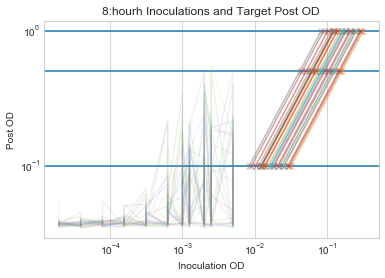

In [82]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np


predictions=doubling_target

strains = df1['SynBioHub URI'].unique()
data=df1.loc[df1['inc_time_2'] == '8:hour']


for target in targets:
    plt.axhline(target)
    
for strain in strains:
    p = data.loc[data['SynBioHub URI'] == strain]
    p = p.sort_values(['od'], ascending=True)
    plt.plot(p['od'], p['post_od_raw'], label=strain,alpha=0.1);


    s = predictions.loc[(predictions['SynBioHub URI'] == strain)  ]
    s = s.sort_values(['post_od_raw'], ascending=True)
    plt.plot(s['od'], s['post_od_raw'], label=None,  marker='x', alpha=0.5);

    
    
    #plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Inoculation OD")
plt.ylabel("Post OD")
plt.title(str(duration) + "h Inoculations and Target Post OD")

